#Warming Up Exercises - Basic Inspection and Exploration:

##Problem 1: Data Read, Write and Inspect:
###• Dataset for the Task: "bank.csv"

1. Load the provided dataset and import in pandas DataFrame.

2. Check info of the DataFrame and identify following:

    (a) columns with dtypes=object

    (b) unique values of those columns.

    (c) check for the total number of null values in each column.

3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”

4. Read ”banknumericdata.csv” and Find the summary statistics.

In [3]:
import pandas as pd

#1:
bank_data = pd.read_csv("/content/drive/MyDrive/Concept of AI/bank .csv")

#2:
print("DataFrame Info:")
print(bank_data.info())

# (a) Columns with dtype=object
object_columns = bank_data.select_dtypes(include=['object']).columns
print("\nColumns with dtype=object:", object_columns)

# (b) Unique values of those columns
for col in object_columns:
    print(f"\nUnique values in column '{col}':")
    print(bank_data[col].unique())

# (c) Total number of null values in each column
print("\nNull values in each column:")
print(bank_data.isnull().sum())

#3:
bank_numeric_data = bank_data.drop(columns=object_columns)
bank_numeric_data.to_csv("banknumericdata.csv", index=False)
print("\nNumeric data saved to 'banknumericdata.csv'.")

#4:
bank_numeric_data = pd.read_csv("banknumericdata.csv")
print("\nSummary statistics of the numeric data:")
print(bank_numeric_data.describe())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

Columns with dtype=object: Index(['job', 'marital', 'education', 'default', '

##Problem 2 - Data Imputations:
###Complete all the following Task:

• Dataset for the Task: "medical_student.csv"

1. Load the provided dataset and import in pandas DataFrame.

2. Check info of the DataFrame and identify column with missing (null) values.

3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.

4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [4]:
import pandas as pd

# 1:
medical_data = pd.read_csv("/content/drive/MyDrive/Concept of AI/medical_students_dataset.csv")

#2:
print("DataFrame Info:")
print(medical_data.info())
print("\nMissing values in each column:")
print(medical_data.isnull().sum())

#3:
# Example: Replace missing values with mean, median, mode, or forward fill/backward fill.
for column in medical_data.columns:
    if medical_data[column].isnull().sum() > 0:
        print(f"\nHandling missing values for column '{column}':")
        if medical_data[column].dtype in ['float64', 'int64']:
            # Use mean for numerical columns
            medical_data[column].fillna(medical_data[column].mean(), inplace=True)
            print(f"Filled missing values with mean: {medical_data[column].mean()}")
        else:
            # Use mode for categorical columns
            medical_data[column].fillna(medical_data[column].mode()[0], inplace=True)
            print(f"Filled missing values with mode: {medical_data[column].mode()[0]}")


print("\nMissing values after imputation:")
print(medical_data.isnull().sum())

#4:
print("\nNumber of duplicate rows in the dataset:")
print(medical_data.duplicated().sum())
medical_data.drop_duplicates(inplace=True)
print("\nDuplicates removed. Current shape of the dataset:")
print(medical_data.shape)


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None

Missing values in each column:
Student ID        20000
Age               20000
Gender            20000
Height            200

<ipython-input-4-7627ae35e865>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  medical_data[column].fillna(medical_data[column].mean(), inplace=True)
<ipython-input-4-7627ae35e865>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

Filled missing values with mode: Male

Handling missing values for column 'Height':
Filled missing values with mean: 174.94710266857416

Handling missing values for column 'Weight':
Filled missing values with mean: 69.97158509186077

Handling missing values for column 'Blood Type':
Filled missing values with mode: B

Handling missing values for column 'BMI':
Filled missing values with mean: 23.338869359639226

Handling missing values for column 'Temperature':
Filled missing values with mean: 98.60094787707666

Handling missing values for column 'Heart Rate':
Filled missing values with mean: 79.50376666666666

Handling missing values for column 'Blood Pressure':
Filled missing values with mean: 114.55803333333333

Handling missing values for column 'Cholesterol':
Filled missing values with mean: 184.4863611111111

Handling missing values for column 'Diabetes':
Filled missing values with mode: No

Handling missing values for column 'Smoking':
Filled missing values with mode: No

Missing 

#3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
##Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?


In [6]:
import pandas as pd

# Load the Titanic dataset
titanic_data = pd.read_csv("/content/drive/MyDrive/Concept of AI/Titanic-Dataset.csv")

# Subset the DataFrame
subset = titanic_data[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
first_class = subset[subset['Pclass'] == 1]

# Calculate statistics for 'Fare'
fare_stats = {
    "Mean": first_class['Fare'].mean(),
    "Median": first_class['Fare'].median(),
    "Max": first_class['Fare'].max(),
    "Min": first_class['Fare'].min()
}
print("\nStatistics for 'Fare' column (First-Class Passengers):")
print(fare_stats)



Statistics for 'Fare' column (First-Class Passengers):
{'Mean': 84.1546875, 'Median': 60.287499999999994, 'Max': 512.3292, 'Min': 0.0}


##Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [7]:
# Count null values in 'Age'
null_age_count = first_class['Age'].isnull().sum()
print(f"\nNumber of null values in 'Age': {null_age_count}")

# Drop rows with null 'Age' values
first_class_cleaned = first_class.dropna(subset=['Age'])

print(f"\nRows after dropping null values in 'Age': {first_class_cleaned.shape[0]}")



Number of null values in 'Age': 30

Rows after dropping null values in 'Age': 186


##Problem - 3:

The 'Embarked' column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:

• 'C' for Cherbourg
• 'Q' for Queenstown
• 'S' for Southampton
Task:
1. Use one-hot encoding to convert the 'Embarked' column into separate binary columns ('Embarked C',
'Embarked Q', 'Embarked S').
2. Add these new columns to the original DataFrame.
3. Drop the original 'Embarked' column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [8]:
# One-hot encode the 'Embarked' column
encoded_embarked = pd.get_dummies(titanic_data['Embarked'], prefix='Embarked')
titanic_data_encoded = pd.concat([titanic_data, encoded_embarked], axis=1)

# Drop the original 'Embarked' column
titanic_data_encoded.drop(columns=['Embarked'], inplace=True)

print("\nModified DataFrame with One-Hot Encoding for 'Embarked':")
print(titanic_data_encoded.head())


Modified DataFrame with One-Hot Encoding for 'Embarked':
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 310

##Problem - 4:
Compare the mean survival rates ('Survived') for the different groups in the 'Sex' column. Draw a visualization to show how the survival distributions vary by gender.


Survival rates by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


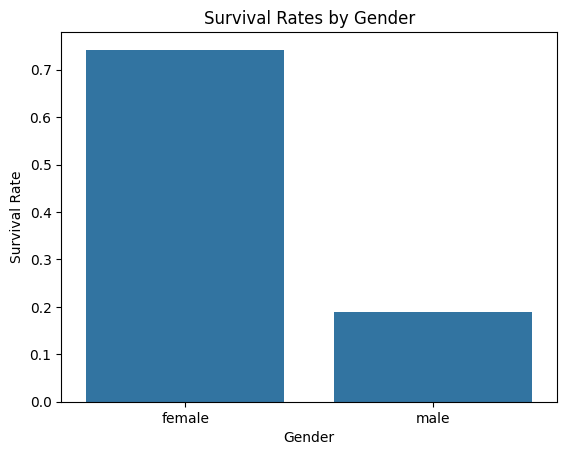

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate survival rates by gender
survival_rates = titanic_data.groupby('Sex')['Survived'].mean()
print("\nSurvival rates by gender:")
print(survival_rates)

# Visualization
sns.barplot(x=survival_rates.index, y=survival_rates.values)
plt.title("Survival Rates by Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Gender")
plt.show()


##Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation ('Em-
barked'). In this instance, compare the ports 'C' (Cherbourg), 'Q' (Queenstown), and 'S' (Southampton).

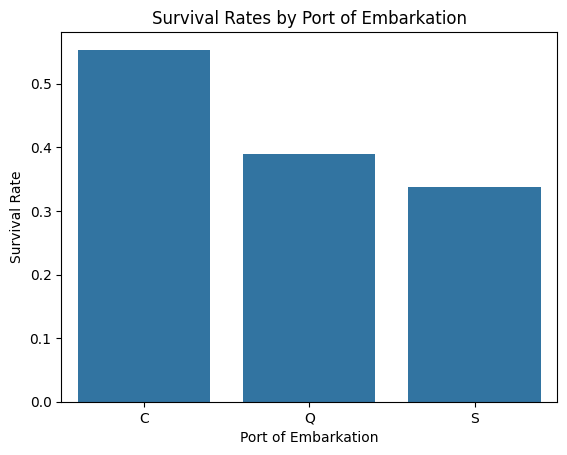

In [12]:
# Calculate survival rates by port of embarkation
embarked_survival = titanic_data.groupby('Embarked')['Survived'].mean()

# Visualization
sns.barplot(x=embarked_survival.index, y=embarked_survival.values)
plt.title("Survival Rates by Port of Embarkation")
plt.ylabel("Survival Rate")
plt.xlabel("Port of Embarkation")
plt.show()


Problem - 6{Optional}:
Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
and age group. Draw a visualization using a any plotting library to represent this graphically.

<ipython-input-14-51b95f5a019f>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_class_survival = titanic_data.groupby(['AgeGroup', 'Pclass'])['Survived'].mean()



Survival rates by Age Group and Passenger Class:
AgeGroup       Pclass
(0.419, 19.0]  1         0.809524
               2         0.742857
               3         0.333333
(19.0, 25.0]   1         0.761905
               2         0.400000
               3         0.197674
(25.0, 31.8]   1         0.666667
               2         0.416667
               3         0.283582
(31.8, 41.0]   1         0.777778
               2         0.461538
               3         0.166667
(41.0, 80.0]   1         0.506667
               2         0.363636
               3         0.088235
Name: Survived, dtype: float64


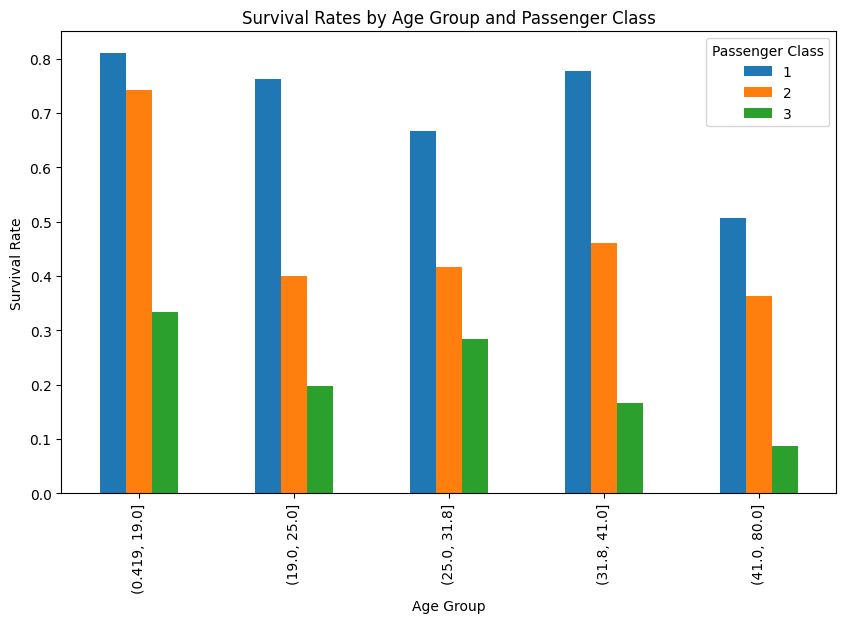

In [14]:
# Create age quantiles
titanic_data['AgeGroup'] = pd.qcut(titanic_data['Age'].dropna(), q=5)

# Calculate survival rates by AgeGroup and Pclass
age_class_survival = titanic_data.groupby(['AgeGroup', 'Pclass'])['Survived'].mean()

print("\nSurvival rates by Age Group and Passenger Class:")
print(age_class_survival)

# Visualization
age_class_survival.unstack().plot(kind='bar', figsize=(10, 6))
plt.title("Survival Rates by Age Group and Passenger Class")
plt.ylabel("Survival Rate")
plt.xlabel("Age Group")
plt.legend(title='Passenger Class')
plt.show()
